<a href="https://colab.research.google.com/github/michaelwise12/nlp-thesis-wise/blob/main/Honors_Thesis_Michael_Wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors Thesis Jupyter Notebook
## Sentiment Analysis of Twitter Data - Comparison of Old-School vs. New-School NLP Methods
### Michael Wise
### Dr. Eitel Lauría
### Marist College | Fall 2022



### Use `snscrape` for scraping tweets

In [4]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 5.8 MB/s 


In [5]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install flair --quiet

     |████████████████████████████████| 401 kB 33.1 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 981 kB 47.9 MB/s 
     |████████████████████████████████| 788 kB 50.2 MB/s 
     |████████████████████████████████| 1.6 MB 11.4 MB/s 
     |████████████████████████████████| 200 kB 34.9 MB/s 
     |████████████████████████████████| 62 kB 740 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.4.1 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.
gym 0.25.2 requires importlib-metadata>=4.8.0; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 29.1 MB/s 
     |████████████████████████████████| 182 kB 76.2 MB/s 
     |████████████████████████████████| 7.6 MB 49.4 MB/s 


In [2]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 20.5 MB/s 
     |████████████████████████████████| 132 kB 60.2 MB/s 
     |████████████████████████████████| 212 kB 68.8 MB/s 
     |████████████████████████████████| 140 kB 65.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [7]:
import pandas as pd
import csv
import re 
import string
import numpy as np
import snscrape
import snscrape.modules.twitter as sntwitter
import itertools
from tqdm.auto import tqdm

In [ ]:
!snscrape twitter-search --help

usage: snscrape twitter-search
       [-h]
       [--cursor CURSOR]
       [--top]
       query

positional arguments:
  query
    A Twitter
    search
    string

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --cursor CURSOR
  --top
    Enable
    fetching
    top tweets
    instead of 
    live/chrono
    logical
    (default:
    False)


In [ ]:
#query = "queen elizabeth -filter:replies until:2022-9-12 since:2022-09-08"
#tweets = []
#limit = 5000

#for tweet in tqdm(sntwitter.TwitterSearchScraper(query).get_items(), total=limit):
#  if len(tweets) == limit:
#    break
#  else:
#    tweets.append([tweet.date, tweet.username, tweet.content, tweet.id])
#
#queen_tweets_df = pd.DataFrame(tweets, columns=['date', 'username', 'text', 'id'])
#queen_tweets_df


In [ ]:
#queen_tweets_df.to_csv('elizabeth_tweets.csv', index=False)

These are keys for the Twitter API in case I need to use it again:

In [ ]:
#consumer_key = "0f4qm087pqjVnInJznVkTFFX8"
#consumer_secret = "eXZVF0o34KBubeaIAZoPq1nkxMqUQWfzgdmZHgvJa6zb2cSAa1"
#access_key= "1378220028-jHlhtOnuUOdWppwd3xQpb1AUmpo0WiSMWwejVPO"
#access_secret = "boVD8zrsiIjNPRBKFSOxShIO9VbU5QPWLfzlgS6FKE6QO"

### Authorize with OAuthhandler

In [ ]:
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_key, access_secret)

In [ ]:
#api = API(auth,wait_on_rate_limit=True)

In [ ]:
#search_words = "[queen, elizabeth, england, death]"      #enter your words
#new_search = search_words + " -filter:retweets"

In [ ]:
#for tweet in tweepy.Cursor(api.search,q=new_search,count=100,
  #                         lang="en",
   #                        since_id=0).items():
   #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])


In [ ]:
#csvFile = open('tweets.csv', 'a')
#csvWriter = csv.writer(csvFile)

## Testing the accuracy of various sentiment labelers compared to prelabeled data

We will test the accuracy of the following sentiment labelers:
* VADER
* Textblob

The following prelabeled data sets will be used:
* Sentiment140
* IMDB Move Reviews

Question: are certain labelers better at labeling certain types/topics of text data? (i.e. social media (less formal) vs. reviews (more formal) vs etc.)

### Loading in IMDB Move reviews (Standford AI Lab)
* 50,000 prelabeled rows: 25000 postive, 25,000 negative


In [ ]:
!wget 'https://github.com/michaelwise12/hbc-wise/raw/main/IMDB%20Dataset.zip'

--2022-12-08 05:41:27--  https://github.com/michaelwise12/hbc-wise/raw/main/IMDB%20Dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/michaelwise12/hbc-wise/main/IMDB%20Dataset.zip [following]
--2022-12-08 05:41:28--  https://raw.githubusercontent.com/michaelwise12/hbc-wise/main/IMDB%20Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25347925 (24M) [application/zip]
Saving to: ‘IMDB Dataset.zip’

IMDB Dataset.zip    100%[===================>]  24.17M  --.-KB/s    in 0.1s    

2022-12-08 05:41:30 (168 MB/s) - ‘IMDB Dataset.zip’ saved [25347925/25347925]



In [ ]:
!unzip '/content/IMDB Dataset.zip'

Archive:  /content/IMDB Dataset.zip
  inflating: IMDB Dataset.csv        


In [ ]:
imdb = pd.read_csv("IMDB Dataset.csv", encoding='latin-1')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
imdb["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### Loading in sentiment140 (1.6 million prelabeled tweets)

In [ ]:
!wget 'https://www.dl.dropboxusercontent.com/s/nwryyn7vht5u9kc/training.1600000.processed.noemoticon.zip'

--2022-12-08 05:41:55--  https://www.dl.dropboxusercontent.com/s/nwryyn7vht5u9kc/training.1600000.processed.noemoticon.zip
Resolving www.dl.dropboxusercontent.com (www.dl.dropboxusercontent.com)... 162.125.64.15, 2620:100:6022:15::a27d:420f
Connecting to www.dl.dropboxusercontent.com (www.dl.dropboxusercontent.com)|162.125.64.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81334274 (78M) [application/zip]
Saving to: ‘training.1600000.processed.noemoticon.zip’

training.1600000.pr 100%[===================>]  77.57M  8.66MB/s    in 9.6s    

2022-12-08 05:42:08 (8.07 MB/s) - ‘training.1600000.processed.noemoticon.zip’ saved [81334274/81334274]



In [ ]:
!unzip '/content/training.1600000.processed.noemoticon.zip'

Archive:  /content/training.1600000.processed.noemoticon.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
colnames=['target', 'ids', 'date', 'flag', 'user', 'text']
sent140 = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names=colnames)
sent140.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Testing the accuracy of VADER and TextBlob compared to sentiment140 & IMDB


In [ ]:
sent140tweets = sent140[["text","target"]]
sent140tweets.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


Relabel the target (sentiment) column

* 0 ⇒ "negative"
* 4 ⇒ "positive"

In [ ]:
sent140tweets.loc[sent140tweets.target == 0, 'target'] = "negative"
sent140tweets.loc[sent140tweets.target == 4, 'target'] = "positive"
sent140tweets

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
1599995,Just woke up. Having no school is the best fee...,positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive


#### Importing the sentiment labelers

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer #vader sentiment labeler
from textblob import TextBlob # textblob sentiment labeler
from flair.models import TextClassifier #flair sentiment labeler
from flair.data import Sentence
from segtok.segmenter import split_single

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
VADERsentiments = SentimentIntensityAnalyzer()

VADER and Textblob compute its own compound sentiment score [-1,1] for each text string in the dataset (takes a little while)


In [ ]:
import time
start =  time.time()

imdb["VADERPolarity"] = [VADERsentiments.polarity_scores(i)["compound"] for i in imdb["review"]]

stop = time.time()
print(f'Sentiment analysis with VADER took: {round((stop-start)/60, 3)} minutes for 50,000 records')

Sentiment analysis with VADER took: 2.122 minutes for 50,000 records


In [ ]:
start =  time.time()

imdb["BlobPolarity"] = [TextBlob(i).sentiment.polarity for i in imdb["review"]]

stop = time.time()
print(f'Sentiment analysis with TextBlob took: {round((stop-start)/60, 3)} minutes for 50,000 records')

Sentiment analysis with TextBlob took: 1.124 minutes for 50,000 records


In [ ]:
imdb

,review,sentiment,VADERPolarity,BlobPolarity
0,One of the other reviewers has mentioned that ...,positive,-0.9951,0.023433
1,A wonderful little production. <br /><br />The...,positive,0.9641,0.109722
2,I thought this was a wonderful way to spend ti...,positive,0.9605,0.354008
3,Basically there's a family where a little boy ...,negative,-0.9213,-0.057813
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,0.217952
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,0.9890,0.394425
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,-0.6693,-0.276190
49997,I am a Catholic taught in parochial elementary...,negative,-0.9851,0.056984
49998,I'm going to have to disagree with the previou...,negative,-0.7648,-0.048663


As we can see, these are two completely different algorithms for determining sentiment score - and they give varying results. Let's do the same procedure on **Sentiment140**.
(right now these are run in vanilla - there might be ways to change how they calculate score)

Let's get 50,000 rows of sentiment140

In [ ]:
sent140tempNeg = sent140tweets[:25000]
sent140tempNeg

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
24995,is sad that it is raining... no softball for m...,negative
24996,Last day of vacation.,negative
24997,"Good Morning! Its a beautiful day, too bad I'm...",negative
24998,night all. love yas. hahahahahah btw... vodka ...,negative


In [ ]:
sent140tempPos = sent140tweets[-25000:]
sent140tempPos

,text,target
1575000,"@orianthi Never heard of that, sounds really y...",positive
1575001,@LizzyBee16 yeah me too. It'll be Twilight Cho...,positive
1575002,http://twitpic.com/7j1mx - Took a look at that...,positive
1575003,Warm in my double-breasted cardigan nice thanx...,positive
1575004,Skype account Alexa.rl en un mesesito a Chile,positive
...,...,...
1599995,Just woke up. Having no school is the best fee...,positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive


In [ ]:
sent140temp = pd.concat([sent140tempNeg, sent140tempPos]).reset_index()
sent140temp

,index,text,target
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,1,is upset that he can't update his Facebook by ...,negative
2,2,@Kenichan I dived many times for the ball. Man...,negative
3,3,my whole body feels itchy and like its on fire,negative
4,4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...,...
49995,1599995,Just woke up. Having no school is the best fee...,positive
49996,1599996,TheWDB.com - Very cool to hear old Walt interv...,positive
49997,1599997,Are you ready for your MoJo Makeover? Ask me f...,positive
49998,1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive


In [ ]:
start = time.time()

sent140temp["VADERPolarity"] = [VADERsentiments.polarity_scores(i)["compound"] for i in sent140temp["text"]]

stop = time.time()
print(f'Sentiment analysis with VADER took: {round((stop-start)/60, 3)} minutes for 50000 records')

Sentiment analysis with VADER took: 0.158 minutes for 50000 records


In [ ]:
start = time.time()

sent140temp["BlobPolarity"] = [TextBlob(i).sentiment.polarity for i in sent140temp["text"]]

stop = time.time()
print(f'Sentiment analysis with Blob took: {round((stop-start)/60, 3)} minutes for 50000 records')

Sentiment analysis with Blob took: 0.242 minutes for 50000 records


In [ ]:
sent140temp

,index,text,target,VADERPolarity,BlobPolarity
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,-0.0173,0.216667
1,1,is upset that he can't update his Facebook by ...,negative,-0.7500,0.000000
2,2,@Kenichan I dived many times for the ball. Man...,negative,0.4939,0.500000
3,3,my whole body feels itchy and like its on fire,negative,-0.2500,0.200000
4,4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597,-0.625000
...,...,...,...,...,...
49995,1599995,Just woke up. Having no school is the best fee...,positive,0.5423,1.000000
49996,1599996,TheWDB.com - Very cool to hear old Walt interv...,positive,0.4376,0.290000
49997,1599997,Are you ready for your MoJo Makeover? Ask me f...,positive,0.3612,0.200000
49998,1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive,0.6784,1.000000


.

In attempt to find a common ground between polarity scores, let's first graph the distribution of scores for each labeler.

#### Distribution of polarity scores for 50000 rows of IMDB:

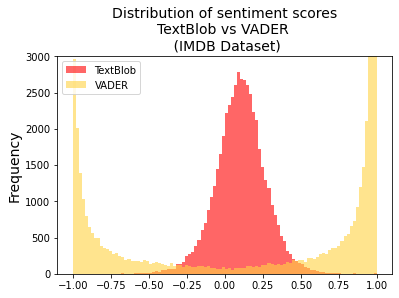

In [ ]:
# distribution for IMDB:
bins = 100
alpha = 0.6
fig = plt.plot(figsize=(20,14))
plt.title('Distribution of sentiment scores\nTextBlob vs VADER \n (IMDB Dataset)', fontsize=14)

ax = plt.gca()

ax.hist(imdb['BlobPolarity'], bins = bins, alpha = alpha, color = 'r')
ax.hist(imdb['VADERPolarity'], bins = bins, alpha = alpha, color = '#ffd343')
ax.set_ylim(0, 3000)
labels= ["TextBlob", "VADER"]
ax.legend(labels)

ax.set_ylabel('Frequency', fontsize = 14)

#fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('IMDBsentnonscaled.png', dpi=300)
plt.show()

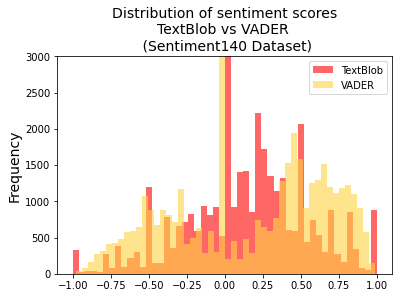

In [ ]:
# distribution for Sentiment140:
bins = 50
alpha = 0.6
fig = plt.plot(figsize=(20,14))

plt.title('Distribution of sentiment scores\nTextBlob vs VADER \n (Sentiment140 Dataset)', fontsize=14)

ax = plt.gca()

ax.hist(sent140temp['BlobPolarity'], bins = bins, alpha = alpha, color = 'r')
ax.hist(sent140temp['VADERPolarity'], bins = bins, alpha = alpha, color = '#ffd343')
ax.set_ylim(0, 3000)
labels= ["TextBlob", "VADER"]
ax.legend(labels)

ax.set_ylabel('Frequency', fontsize = 14)

#fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.savefig('140sentnonscaled.png', dpi=300)
plt.show()

---
Trying different techniques to get normalize the polarity scores of Flair and VADER.

This should actually work decently well on TextBlob because it already resembles a Gaussian normal distribution.

In [ ]:
imdbtemp2 = imdbtemp

In [ ]:
imdbtempscores = imdb[['BlobPolarity', 'VADERPolarity']]
imdbtempscores

,BlobPolarity,VADERPolarity
0,0.023433,-0.9951
1,0.109722,0.9641
2,0.354008,0.9605
3,-0.057813,-0.9213
4,0.217952,0.9744
...,...,...
49995,0.394425,0.9890
49996,-0.276190,-0.6693
49997,0.056984,-0.9851
49998,-0.048663,-0.7648


#### Rescaling IMDB with MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
imdbscaledscoresMM = scaler.fit_transform(imdbtempscores)

In [ ]:
imdbscaledscoresMM

array([[0.51171659, 0.00235035],
       [0.55486111, 0.98209731],
       [0.67700397, 0.98029704],
       ...,
       [0.52849206, 0.0073511 ],
       [0.47566834, 0.11751763],
       [0.56      , 0.71645747]])

In [ ]:
imdbMinMaxScaled = pd.DataFrame(imdbscaledscoresMM, columns = ['NewBlobScoreMM','NewVADERScoreMM'])
imdbMinMaxScaled

,NewBlobScoreMM,NewVADERScoreMM
0,0.511717,0.002350
1,0.554861,0.982097
2,0.677004,0.980297
3,0.471094,0.039256
4,0.608976,0.987248
...,...,...
49995,0.697212,0.994549
49996,0.361905,0.165275
49997,0.528492,0.007351
49998,0.475668,0.117518


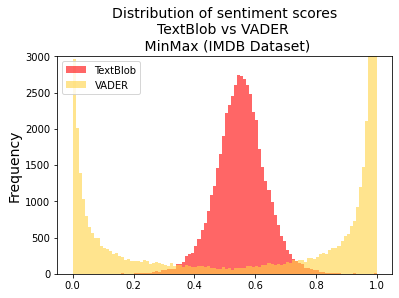

In [ ]:
bins = 100
fig = plt.plot(figsize=(8,7))

plt.title('Distribution of sentiment scores\nTextBlob vs VADER \n MinMax (IMDB Dataset)', fontsize=14)

ax = plt.gca()

ax.hist(imdbMinMaxScaled['NewBlobScoreMM'], bins = bins, alpha = alpha, color = 'r')
ax.hist(imdbMinMaxScaled['NewVADERScoreMM'], bins = bins, alpha = alpha, color = '#ffd343')
ax.set_ylim(0, 3000)
labels= ["TextBlob", "VADER"]
ax.legend(labels)

ax.set_ylabel('Frequency', fontsize = 14)

#fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

#### Rescaling Sentiment140 with MinMaxScaler

In [ ]:
sent140tempscores = sent140temp[['BlobPolarity', 'VADERPolarity']]
sent140tempscores

,BlobPolarity,VADERPolarity
0,0.216667,-0.0173
1,0.000000,-0.7500
2,0.500000,0.4939
3,0.200000,-0.2500
4,-0.625000,-0.6597
...,...,...
49995,1.000000,0.5423
49996,0.290000,0.4376
49997,0.200000,0.3612
49998,1.000000,0.6784


In [ ]:
scaler = MinMaxScaler()
# transform data
sent140scaledscoresMM = scaler.fit_transform(sent140tempscores)
sent140scaledscoresMM

array([[0.60833333, 0.4891925 ],
       [0.5       , 0.11567088],
       [0.75      , 0.74979608],
       ...,
       [0.6       , 0.68214723],
       [1.        , 0.84385196],
       [0.9       , 0.78955954]])

In [ ]:
sent140MinMaxScaled = pd.DataFrame(sent140scaledscoresMM, columns = ['NewBlobScoreMM','NewVADERScoreMM'])
sent140MinMaxScaled

,NewBlobScoreMM,NewVADERScoreMM
0,0.608333,0.489192
1,0.500000,0.115671
2,0.750000,0.749796
3,0.600000,0.370565
4,0.187500,0.161705
...,...,...
49995,1.000000,0.774470
49996,0.645000,0.721095
49997,0.600000,0.682147
49998,1.000000,0.843852


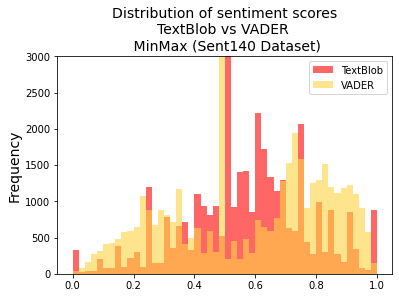

In [ ]:
bins = 50
fig = plt.plot(figsize=(8,7))

plt.title('Distribution of sentiment scores\nTextBlob vs VADER \n MinMax (Sent140 Dataset)', fontsize=14)

ax = plt.gca()

ax.hist(sent140MinMaxScaled['NewBlobScoreMM'], bins = bins, alpha = alpha, color = 'r')
ax.hist(sent140MinMaxScaled['NewVADERScoreMM'], bins = bins, alpha = alpha, color = '#ffd343')
ax.set_ylim(0, 3000)
labels= ["TextBlob", "VADER"]
ax.legend(labels)

ax.set_ylabel('Frequency', fontsize = 14)

#fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

#### Rescaling IMDB + Sent140 with StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler2 = StandardScaler()
# transform data
imdbscaledscoresSS = scaler2.fit_transform(imdbtempscores)
imdbscaledscoresSS

array([[-0.48977148, -1.60580815],
       [ 0.03867713,  0.82487543],
       [ 1.53472392,  0.82040908],
       ...,
       [-0.28429984, -1.59340164],
       [-0.9313026 , -1.32008621],
       [ 0.10161997,  0.16584158]])

In [ ]:
sent140scaledscoresSS = scaler2.fit_transform(sent140tempscores)
sent140scaledscoresSS

array([[ 0.33921178, -0.3441801 ],
       [-0.28624939, -1.96591436],
       [ 1.15712254,  0.78729329],
       ...,
       [ 0.29109938,  0.49357945],
       [ 2.60049447,  1.19565957],
       [ 2.0231457 ,  0.95993595]])

In [ ]:
imdbStandScaled = pd.DataFrame(imdbscaledscoresSS, columns = ['NewBlobScoreSS','NewVADERScoreSS'])
imdbStandScaled

,NewBlobScoreSS,NewVADERScoreSS
0,-0.489771,-1.605808
1,0.038677,0.824875
2,1.534724,0.820409
3,-0.987334,-1.514248
4,0.701496,0.837654
...,...,...
49995,1.782242,0.855768
49996,-2.324717,-1.201604
49997,-0.284300,-1.593402
49998,-0.931303,-1.320086


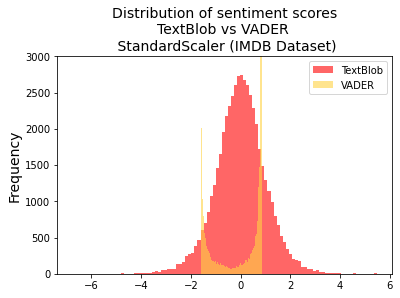

In [ ]:
bins = 100
fig = plt.plot(figsize=(8,7))

plt.title('Distribution of sentiment scores\nTextBlob vs VADER \n StandardScaler (IMDB Dataset)', fontsize=14)

ax = plt.gca()

ax.hist(imdbStandScaled['NewBlobScoreSS'], bins = bins, alpha = alpha, color = 'r')
ax.hist(imdbStandScaled['NewVADERScoreSS'], bins = bins, alpha = alpha, color = '#ffd343')
ax.set_ylim(0, 3000)
labels= ["TextBlob", "VADER"]
ax.legend(labels)

ax.set_ylabel('Frequency', fontsize = 14)

#fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

In [ ]:
sent140StandScaled = pd.DataFrame(sent140scaledscoresSS, columns = ['NewBlobScoreSS','NewVADERScoreSS'])
sent140StandScaled

,NewBlobScoreSS,NewVADERScoreSS
0,0.339212,-0.344180
1,-0.286249,-1.965914
2,1.157123,0.787293
3,0.291099,-0.859231
4,-2.090464,-1.766047
...,...,...
49995,2.600494,0.894420
49996,0.550906,0.662681
49997,0.291099,0.493579
49998,2.600494,1.195660


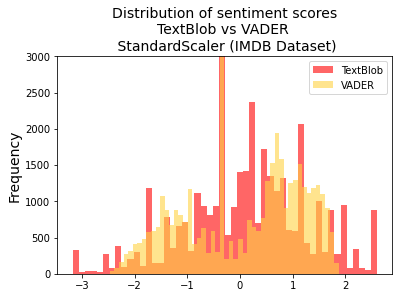

In [ ]:
bins = 50
fig = plt.plot(figsize=(8,7))

plt.title('Distribution of sentiment scores\nTextBlob vs VADER \n StandardScaler (IMDB Dataset)', fontsize=14)

ax = plt.gca()

ax.hist(sent140StandScaled['NewBlobScoreSS'], bins = bins, alpha = alpha, color = 'r')
ax.hist(sent140StandScaled['NewVADERScoreSS'], bins = bins, alpha = alpha, color = '#ffd343')
ax.set_ylim(0, 3000)
labels= ["TextBlob", "VADER"]
ax.legend(labels)

ax.set_ylabel('Frequency', fontsize = 14)

#fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

At the end of the day: focus on the labeler that is best for social media data rather than overall. Standard scaling seems a little better in this case.

-----------------------

Threshold (we will eventually remove the neutral class):
* positive sentiment: compound/polarity score >= ?
* negative sentiment: compound score <= ?

TO DO: We might need to have different thresholds for all the labelers - this is something to figure out.

In [ ]:
imdbtempscaled = pd.concat([imdb, imdbStandScaled], axis=1)
imdbtempscaled.head(10)

,review,sentiment,VADERPolarity,BlobPolarity,NewBlobScoreSS,NewVADERScoreSS
0,One of the other reviewers has mentioned that ...,positive,-0.9951,0.023433,-0.489771,-1.605808
1,A wonderful little production. <br /><br />The...,positive,0.9641,0.109722,0.038677,0.824875
2,I thought this was a wonderful way to spend ti...,positive,0.9605,0.354008,1.534724,0.820409
3,Basically there's a family where a little boy ...,negative,-0.9213,-0.057813,-0.987334,-1.514248
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,0.217952,0.701496,0.837654
5,"Probably my all-time favorite movie, a story o...",positive,0.9828,0.155294,0.317767,0.848076
6,I sure would like to see a resurrection of a u...,positive,0.9022,0.285522,1.115304,0.748079
7,"This show was an amazing, fresh & innovative i...",negative,0.8596,0.082716,-0.126713,0.695227
8,Encouraged by the positive comments about this...,negative,0.2362,-0.142863,-1.508196,-0.078194
9,If you like original gut wrenching laughter yo...,positive,0.9149,0.415000,1.908250,0.763835


In [ ]:
sent140tempscaled = pd.concat([sent140temp, sent140StandScaled], axis=1)
sent140tempscaled.head(10)

,index,text,target,VADERPolarity,BlobPolarity,NewBlobScoreSS,NewVADERScoreSS
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,-0.0173,0.216667,0.339212,-0.344180
1,1,is upset that he can't update his Facebook by ...,negative,-0.7500,0.000000,-0.286249,-1.965914
2,2,@Kenichan I dived many times for the ball. Man...,negative,0.4939,0.500000,1.157123,0.787293
3,3,my whole body feels itchy and like its on fire,negative,-0.2500,0.200000,0.291099,-0.859231
4,4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597,-0.625000,-2.090464,-1.766047
5,5,@Kwesidei not the whole crew,negative,0.0000,0.200000,0.291099,-0.305889
6,6,Need a hug,negative,0.4767,0.000000,-0.286249,0.749223
7,7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,0.7450,0.270833,0.495577,1.343070
8,8,@Tatiana_K nope they didn't have it,negative,0.0000,0.000000,-0.286249,-0.305889
9,9,@twittera que me muera ?,negative,0.0000,0.000000,-0.286249,-0.305889


#### CalcSent with Standard Scaled Polarity

In [ ]:
def calcsent(score):
  if score >= 0.5:
    return 'positive'
  elif score <= -0.5:
      return 'negative'
  else:
      return 'neutral'

In [ ]:
sent140tempscaled['VADERPredSentiment'] = sent140tempscaled.apply(lambda c: calcsent(c['NewVADERScoreSS']), axis=1)

In [ ]:
sent140tempscaled['BlobPredSentiment'] = sent140tempscaled.apply(lambda c: calcsent(c['NewBlobScoreSS']), axis=1)

In [ ]:
imdbtempscaled['VADERPredSentiment'] = imdbtempscaled.apply(lambda c: calcsent(c['NewVADERScoreSS']), axis=1)

In [ ]:
imdbtempscaled['BlobPredSentiment'] = imdbtempscaled.apply(lambda c: calcsent(c['NewBlobScoreSS']), axis=1)

In [ ]:
sent140tempscaled.head(10)

,index,text,target,VADERPolarity,BlobPolarity,NewBlobScoreSS,NewVADERScoreSS,VADERPredSentiment,BlobPredSentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,-0.0173,0.216667,0.339212,-0.344180,neutral,neutral
1,1,is upset that he can't update his Facebook by ...,negative,-0.7500,0.000000,-0.286249,-1.965914,negative,neutral
2,2,@Kenichan I dived many times for the ball. Man...,negative,0.4939,0.500000,1.157123,0.787293,positive,positive
3,3,my whole body feels itchy and like its on fire,negative,-0.2500,0.200000,0.291099,-0.859231,negative,neutral
4,4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597,-0.625000,-2.090464,-1.766047,negative,negative
5,5,@Kwesidei not the whole crew,negative,0.0000,0.200000,0.291099,-0.305889,neutral,neutral
6,6,Need a hug,negative,0.4767,0.000000,-0.286249,0.749223,positive,neutral
7,7,@LOLTrish hey long time no see! Yes.. Rains a...,negative,0.7450,0.270833,0.495577,1.343070,positive,neutral
8,8,@Tatiana_K nope they didn't have it,negative,0.0000,0.000000,-0.286249,-0.305889,neutral,neutral
9,9,@twittera que me muera ?,negative,0.0000,0.000000,-0.286249,-0.305889,neutral,neutral


In [ ]:
imdbtempscaled.head(10)

,review,sentiment,VADERPolarity,BlobPolarity,NewBlobScoreSS,NewVADERScoreSS,VADERPredSentiment,BlobPredSentiment
0,One of the other reviewers has mentioned that ...,positive,-0.9951,0.023433,-0.489771,-1.605808,negative,neutral
1,A wonderful little production. <br /><br />The...,positive,0.9641,0.109722,0.038677,0.824875,positive,neutral
2,I thought this was a wonderful way to spend ti...,positive,0.9605,0.354008,1.534724,0.820409,positive,positive
3,Basically there's a family where a little boy ...,negative,-0.9213,-0.057813,-0.987334,-1.514248,negative,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,0.217952,0.701496,0.837654,positive,positive
5,"Probably my all-time favorite movie, a story o...",positive,0.9828,0.155294,0.317767,0.848076,positive,neutral
6,I sure would like to see a resurrection of a u...,positive,0.9022,0.285522,1.115304,0.748079,positive,positive
7,"This show was an amazing, fresh & innovative i...",negative,0.8596,0.082716,-0.126713,0.695227,positive,neutral
8,Encouraged by the positive comments about this...,negative,0.2362,-0.142863,-1.508196,-0.078194,neutral,negative
9,If you like original gut wrenching laughter yo...,positive,0.9149,0.415000,1.908250,0.763835,positive,positive


In [ ]:
imdbtempscaled.to_csv('imdbtempscaled1023.csv', index=False)

In [ ]:
sent140tempscaled.to_csv('sent140tempscaled1023.csv', index=False)

In [ ]:
imdbtempscaled['VADERPredSentiment'].value_counts()

positive    27574
negative    16634
neutral      5792
Name: VADERPredSentiment, dtype: int64

In [ ]:
imdbtempscaled['BlobPredSentiment'].value_counts()

neutral     21014
positive    14531
negative    14455
Name: BlobPredSentiment, dtype: int64

Blob predicts a lot of neutrals and tends to evaluate a lot closer to polarity=0 than VADER does.

In [ ]:
sent140tempscaled['VADERPredSentiment'].value_counts()

neutral     19685
positive    18004
negative    12311
Name: VADERPredSentiment, dtype: int64

In [ ]:
sent140tempscaled['BlobPredSentiment'].value_counts()

neutral     28069
positive    12738
negative     9193
Name: BlobPredSentiment, dtype: int64

**To do:** Removing neutral values and determining consistent positive/negative split. Also since Flair isn't in the equation, expand this process to a much larger sample (ie the whole datasets)

### Remove any reviews/tweets where the sentiment isn't detected to be polar enough  - ie neutral (too in the middle according to both VADER and Blob)

In [ ]:
sent140tempPN = sent140tempscaled[sent140tempscaled['VADERPredSentiment'] != "neutral"]

In [ ]:
sent140tempPN2 = sent140tempPN[sent140tempPN['BlobPredSentiment'] != "neutral"]

In [ ]:
sent140tempPN2

,index,text,target,VADERPolarity,BlobPolarity,NewBlobScoreSS,NewVADERScoreSS,VADERPredSentiment,BlobPredSentiment
2,2,@Kenichan I dived many times for the ball. Man...,negative,0.4939,0.50000,1.157123,0.787293,positive,positive
4,4,"@nationwideclass no, it's not behaving at all....",negative,-0.6597,-0.62500,-2.090464,-1.766047,negative,negative
18,18,@LettyA ahh ive always wanted to see rent lov...,negative,0.6988,0.78125,1.969019,1.240812,positive,positive
25,25,I hate when I have to call and wake people up,negative,-0.5719,-0.80000,-2.595644,-1.571714,negative,negative
27,27,im sad now Miss.Lilly,negative,-0.4767,-0.50000,-1.729621,-1.361001,negative,negative
...,...,...,...,...,...,...,...,...,...
49994,1599994,"@Cliff_Forster Yeah, that does work better tha...",positive,0.7906,0.60000,1.445797,1.443999,positive,positive
49995,1599995,Just woke up. Having no school is the best fee...,positive,0.5423,1.00000,2.600494,0.894420,positive,positive
49996,1599996,TheWDB.com - Very cool to hear old Walt interv...,positive,0.4376,0.29000,0.550906,0.662681,positive,positive
49998,1599998,Happy 38th Birthday to my boo of alll time!!! ...,positive,0.6784,1.00000,2.600494,1.195660,positive,positive


In [ ]:
sent140tempPN2.shape

(17679, 9)

In [ ]:
imdbPN = imdbtempscaled[imdbtempscaled['VADERPredSentiment'] != "neutral"]

In [ ]:
imdbPN2 = imdbPN[imdbPN['BlobPredSentiment'] != "neutral"]

In [ ]:
imdbPN2

,review,sentiment,VADERPolarity,BlobPolarity,NewBlobScoreSS,NewVADERScoreSS,VADERPredSentiment,BlobPredSentiment
2,I thought this was a wonderful way to spend ti...,positive,0.9605,0.354008,1.534724,0.820409,positive,positive
3,Basically there's a family where a little boy ...,negative,-0.9213,-0.057813,-0.987334,-1.514248,negative,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.9744,0.217952,0.701496,0.837654,positive,positive
6,I sure would like to see a resurrection of a u...,positive,0.9022,0.285522,1.115304,0.748079,positive,positive
9,If you like original gut wrenching laughter yo...,positive,0.9149,0.415000,1.908250,0.763835,positive,positive
...,...,...,...,...,...,...,...,...
49991,"Les Visiteurs, the first movie about the medie...",negative,0.9625,0.003987,-0.608861,0.822890,positive,negative
49994,This is your typical junk comedy.<br /><br />T...,negative,-0.9713,-0.294737,-2.438298,-1.576281,negative,negative
49995,I thought this movie did a down right good job...,positive,0.9890,0.394425,1.782242,0.855768,positive,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,-0.6693,-0.276190,-2.324717,-1.201604,negative,negative


In [ ]:
imdbpred = imdbPN2["sentiment"]
VADERimdbpred = imdbPN2["VADERPredSentiment"]
Blobimdbpred = imdbPN2["BlobPredSentiment"]

In [ ]:
sent140pred = sent140tempPN["target"]
VADERsent140pred = sent140tempPN2["VADERPredSentiment"]
Blobsent140pred = sent140tempPN2["BlobPredSentiment"]

In [ ]:
from sklearn import metrics

IMDBagreementVB = metrics.accuracy_score(VADERimdbpred, Blobimdbpred)
sent140agreementVB = metrics.accuracy_score(VADERsent140pred, Blobsent140pred)

In [ ]:
IMDBagreementVB

0.8881949499980842

In [ ]:
sent140agreementVB

0.9014650149895356

In [ ]:
### then
# take the scores that match
# and compare to the orginials

Sentiment 140 accuracy from HBC: 0.8042646503786831

IMDB movie reviews accuracy: 0.8678382037684757

While we can get TextBlob and VADER to agree quite a bit, we opt that it's better just to stick to one, and in this case, VADER is just the stronger option.

# Sentiment Analysis

## Naive Bayes + BOW (Old School)

## Reading the raw data

In [10]:
!wget 'https://raw.githubusercontent.com/michaelwise12/hbc-wise/main/ukraine_tweets.csv'

--2022-12-10 00:43:41--  https://raw.githubusercontent.com/michaelwise12/hbc-wise/main/ukraine_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11847102 (11M) [text/plain]
Saving to: ‘ukraine_tweets.csv’

ukraine_tweets.csv  100%[===================>]  11.30M  --.-KB/s    in 0.03s   

2022-12-10 00:43:42 (327 MB/s) - ‘ukraine_tweets.csv’ saved [11847102/11847102]



We will use the vader lexicon to classify our Tweets.

In [11]:
ukraine_data = pd.read_csv("ukraine_tweets.csv")
ukraine_data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.514120e+18,1.514120e+18,2022-04-13 05:42:14 UTC,4/13/2022,5:42:14,0,1.688715e+08,kohteix,kohtei,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.514120e+18,1.514000e+18,2022-04-13 05:42:13 UTC,4/13/2022,5:42:13,0,1.496720e+18,marcosmilep,Marco,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KyivIndependent', 'name': 'T...",NaN,NaN,NaN,NaN
2,1.514120e+18,1.514110e+18,2022-04-13 05:42:12 UTC,4/13/2022,5:42:12,0,1.459560e+18,unnoble_savage,Incomplete Arguments 🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'KyivIndependent', 'name': 'T...",NaN,NaN,NaN,NaN
3,1.514120e+18,1.514080e+18,2022-04-13 05:42:12 UTC,4/13/2022,5:42:12,0,1.500420e+18,meangenel,meangeneLbrother,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sam26407516', 'name': 'sam',...",NaN,NaN,NaN,NaN
4,1.514120e+18,1.513520e+18,2022-04-13 05:42:11 UTC,4/13/2022,5:42:11,0,8.438083e+07,kamiloalvarez,Kam,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BIGTCsoupywolf', 'name': 'im...",NaN,NaN,NaN,NaN


In [12]:
ukraine_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [13]:
ukraine_tweets = ukraine_data[["username", "tweet", "language"]]

In [14]:
ukraine_tweets.head(10)

,username,tweet,language
0,kohteix,📚マメ知識👩 極東ロシアの💵出稼ぎ先💶の主流が韓国に👧👩ロシアから愛をこめて💋Россия💄...,ja
1,marcosmilep,@KyivIndependent @irimiandra 💢This is the diff...,en
2,unnoble_savage,@KyivIndependent I'm pretty sure no one countr...,en
3,meangenel,@sam26407516 @Dull_guy25 @MapsUkraine That's w...,en
4,kamiloalvarez,@BIGTCsoupywolf @nicolas65728620 @ScoottyU @Th...,en
5,8pisaac_sonishi,#UkraineRussiaWar はやはり #us vs.#Russia の代理戦争！,ja
6,iamtiye,@POTUS You mean Biden's intereference sanction...,en
7,sebastienk,The EU wants to take choice away from consumer...,en
8,_carymile_,@iiumirose @docowboyslikeme It's not one perso...,en
9,ulibeudgen,Story: @AFP: 'City in ruins. @AFP's Alexander...,en


In [15]:
ukraine_tweets.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [16]:
ukraine_tweets["language"].value_counts()

en     17307
it       757
und      535
pt       241
ru       227
in       156
ja       132
hi       109
es        67
de        65
ur        45
fr        33
ca        32
fi        31
th        25
nl        25
zh        24
pl        23
tl        20
ro        18
cs        16
et        15
uk        14
el        14
ta        10
tr         8
sl         6
sv         6
te         6
ar         6
ml         5
no         5
gu         4
da         4
ht         3
kn         3
ne         3
lt         2
cy         2
pa         2
lv         2
mr         2
vi         1
ko         1
bn         1
or         1
fa         1
bg         1
hu         1
ps         1
sr         1
Name: language, dtype: int64

For now, let's stick with tweets that are in English.

In [17]:
ukraine_tweets = ukraine_tweets[ukraine_tweets["language"] == "en"]

In [18]:
ukraine_tweets

,username,tweet,language
1,marcosmilep,@KyivIndependent @irimiandra 💢This is the diff...,en
2,unnoble_savage,@KyivIndependent I'm pretty sure no one countr...,en
3,meangenel,@sam26407516 @Dull_guy25 @MapsUkraine That's w...,en
4,kamiloalvarez,@BIGTCsoupywolf @nicolas65728620 @ScoottyU @Th...,en
6,iamtiye,@POTUS You mean Biden's intereference sanction...,en
...,...,...,...
20012,wealthopinion,China and Russia continue to develop and deplo...,en
20014,sjmagill73,@Natalii35994996 @laurenboebert Russia deems t...,en
20015,boltalogger,"In one of the regions of Russia, local residen...",en
20017,mr_arrowhead,Ion why I think Sweden/Russia when I watch Mid...,en


In [19]:
# create fresh copy before preprocesing to be used to transformers later
ukraine_tweetsT = ukraine_tweets.copy()

## Preprocessing (For Naive Bayes)
### Cleaning the tweets by removing stop words, typos, emojis and punctuation with the `NTLK` package
### Future investigation: leave certain punctuation in string

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Snowball Stemmer - reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem.

**Examples:**


*   cared  ⇒  care
* university  ⇒ univers
* fairly ⇒ fair
* easily ⇒ easili
* singing ⇒ sing
* sings ⇒ sing
* sung ⇒ sung
* singer ⇒ singer
* sportingly⇒ sport

Pros: word list becomes smaller, makes predictions more accurate

Cons: new formed sentences are less legible to humans

In [24]:
def clean(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = str(text).lower() #change to lowercase
    text = re.sub('\[.*?\]', '', text)       #punctuation
    text = re.sub('@[^\s]+','',text) # usernames
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
ukraine_tweets["tweet"] = ukraine_tweets["tweet"].apply(clean)

In [25]:
ukraine_tweets.head(10)

,username,tweet,language
1,marcosmilep,differ ukrain give highprofil prison ukrain...,en
2,unnoble_savage,im pretti sure one countri hate russia much p...,en
3,meangenel,that russia lost troop tank year afghanist...,en
4,kamiloalvarez,compar ussr tech russia tech xd go read m...,en
6,iamtiye,mean biden interefer sanction russia driven g...,en
7,sebastienk,eu want take choic away consum eu say million ...,en
8,_carymile_,one person russia major russian support war ...,en
9,ulibeudgen,stori citi ruin alexand nemenov photograph ...,en
10,jasminepittend1,ukrainerussia war live updat unit state say pr...,en
11,kyivindependent,⚡️ un civilian casualti ukrain result russia ...,en


### `VADER` does classification in three categories: *positive*, *negative*, and *neutral*

In [26]:
sentiments = SentimentIntensityAnalyzer()

In [27]:
ukraine_tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in ukraine_tweets["tweet"]]
ukraine_tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in ukraine_tweets["tweet"]]
ukraine_tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in ukraine_tweets["tweet"]]
ukraine_tweets["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in ukraine_tweets["tweet"]]
ukraine_tweets = ukraine_tweets[["tweet", "Positive", "Negative", "Neutral", "Compound"]]

In [28]:
ukraine_tweets.head(10)

,tweet,Positive,Negative,Neutral,Compound
1,differ ukrain give highprofil prison ukrain...,0.000,0.148,0.852,-0.5106
2,im pretti sure one countri hate russia much p...,0.153,0.247,0.600,-0.3400
3,that russia lost troop tank year afghanist...,0.000,0.360,0.640,-0.7351
4,compar ussr tech russia tech xd go read m...,0.347,0.071,0.582,0.8860
6,mean biden interefer sanction russia driven g...,0.000,0.259,0.741,-0.5423
7,eu want take choic away consum eu say million ...,0.159,0.000,0.841,0.4767
8,one person russia major russian support war ...,0.164,0.426,0.410,-0.8519
9,stori citi ruin alexand nemenov photograph ...,0.000,0.167,0.833,-0.5859
10,ukrainerussia war live updat unit state say pr...,0.000,0.302,0.698,-0.5994
11,⚡️ un civilian casualti ukrain result russia ...,0.000,0.428,0.572,-0.9595


#### Sentiment compound score in standard literature:

* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

In [29]:
def calcsentiment(score):
  if score >= 0.05:
      return 'positive'
  elif score <= -0.05:
      return 'negative'
  else:
      return 'neutral'

In [30]:
ukraine_tweets['Sentiment'] = ukraine_tweets.apply(lambda c: calcsentiment(c['Compound']), axis=1)

<ipython-input-30-8bebb242239e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine_tweets['Sentiment'] = ukraine_tweets.apply(lambda c: calcsentiment(c['Compound']), axis=1)


In [31]:
ukraine_tweets.head(10)

,tweet,Positive,Negative,Neutral,Compound,Sentiment
1,differ ukrain give highprofil prison ukrain...,0.000,0.148,0.852,-0.5106,negative
2,im pretti sure one countri hate russia much p...,0.153,0.247,0.600,-0.3400,negative
3,that russia lost troop tank year afghanist...,0.000,0.360,0.640,-0.7351,negative
4,compar ussr tech russia tech xd go read m...,0.347,0.071,0.582,0.8860,positive
6,mean biden interefer sanction russia driven g...,0.000,0.259,0.741,-0.5423,negative
7,eu want take choic away consum eu say million ...,0.159,0.000,0.841,0.4767,positive
8,one person russia major russian support war ...,0.164,0.426,0.410,-0.8519,negative
9,stori citi ruin alexand nemenov photograph ...,0.000,0.167,0.833,-0.5859,negative
10,ukrainerussia war live updat unit state say pr...,0.000,0.302,0.698,-0.5994,negative
11,⚡️ un civilian casualti ukrain result russia ...,0.000,0.428,0.572,-0.9595,negative


In [32]:
ukraine_tweets["Sentiment"].value_counts()

negative    8695
positive    4767
neutral     3845
Name: Sentiment, dtype: int64

Looks like we have a good mix of tweets that were labeled negative, neutral, and positive. Let's just stitch these predicted sentiments to our copy taken before preprocessing so we can use the labels for training & fine-tuning our models.

In [33]:
ukraine_tweetsTR = pd.concat([ukraine_tweetsT, ukraine_tweets["Sentiment"]], axis=1)
ukraine_tweetsTR

,username,tweet,language,Sentiment
1,marcosmilep,@KyivIndependent @irimiandra 💢This is the diff...,en,negative
2,unnoble_savage,@KyivIndependent I'm pretty sure no one countr...,en,negative
3,meangenel,@sam26407516 @Dull_guy25 @MapsUkraine That's w...,en,negative
4,kamiloalvarez,@BIGTCsoupywolf @nicolas65728620 @ScoottyU @Th...,en,positive
6,iamtiye,@POTUS You mean Biden's intereference sanction...,en,negative
...,...,...,...,...
20012,wealthopinion,China and Russia continue to develop and deplo...,en,negative
20014,sjmagill73,@Natalii35994996 @laurenboebert Russia deems t...,en,neutral
20015,boltalogger,"In one of the regions of Russia, local residen...",en,neutral
20017,mr_arrowhead,Ion why I think Sweden/Russia when I watch Mid...,en,neutral


## The next step - Classification

### BOW + Naive Bayes

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [109]:
count_vect = CountVectorizer() # run it plain vanilla

print(count_vect)

CountVectorizer()


Similar to what we did when comparing VADER to the sentiment140 dataset, we are going to drop all of the "neutral" values, turning this into a binary classification problem.

In [110]:
ukraine_tweetsPN = ukraine_tweets[ukraine_tweets['Sentiment'] != "neutral"]

In [111]:
ukraine_tweetsPN

,tweet,Positive,Negative,Neutral,Compound,Sentiment
1,differ ukrain give highprofil prison ukrain...,0.000,0.148,0.852,-0.5106,negative
2,im pretti sure one countri hate russia much p...,0.153,0.247,0.600,-0.3400,negative
3,that russia lost troop tank year afghanist...,0.000,0.360,0.640,-0.7351,negative
4,compar ussr tech russia tech xd go read m...,0.347,0.071,0.582,0.8860,positive
6,mean biden interefer sanction russia driven g...,0.000,0.259,0.741,-0.5423,negative
...,...,...,...,...,...,...
20005,idiot offic danger especi abandon belarus...,0.000,0.658,0.342,-0.8625,negative
20007,dear yukrain open ur eye keep push weapon amm...,0.084,0.071,0.844,0.1027,positive
20011,fear outlook global econom growth among larg i...,0.097,0.266,0.637,-0.6705,negative
20012,china russia continu develop deploy weapon att...,0.000,0.261,0.739,-0.6486,negative


In [112]:
x = ukraine_tweetsPN["tweet"]
y = ukraine_tweetsPN["Sentiment"]

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [114]:
x_train = count_vect.fit_transform(x_train).toarray()
x_test = count_vect.transform(x_test).toarray()

In [115]:
print(x_train.shape)
x_train

(10096, 13168)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Multinomial NB training

In [116]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [117]:
predictions = model.predict(x_test)
predictions

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

## Old School model evaluation

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,roc_curve, auc

In [119]:
# Report the predictive performance metrics
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
precision=precision_score(y_test, predictions, pos_label="negative")
recall=recall_score(y_test, predictions,  pos_label="negative")
specificity=recall_score(y_test, predictions, pos_label="negative")

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........:{(1-specificity) * 100:.4f}")



Accuracy.........: 80.4516
Precision........: 80.9894
Recall...........: 91.1224
FP Rate...........:8.8776


Confusion matrix.:
 [[1981  193]
 [ 465  727]]


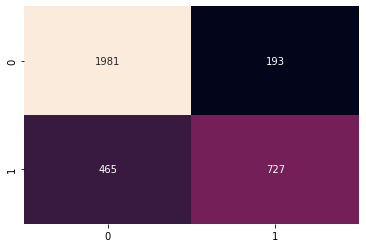

In [ ]:
cm = confusion_matrix(y_test, predictions)
print(f"Confusion matrix.:\n {cm}")

#This is nicer
sns.heatmap(cm, annot=True,fmt='d',cbar=False);

Wow! 80% accuracy with bag of words + naive bayes! I'm sure we can do a lot better too.

## Preprocessing (For Transformers)

Unlike for Naive Bayes/BOW, we actually don't have to do as much preprocessing. This is because transformers are trained to handle things like stop words, emojis, and punctuation. These all help models like BERT figure out context.

In [20]:
import torch

# Utilize the GPU
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


First and foremost, we need to preprocess our data a little differently when working with transformers. Since these models use everything (from stopwords, to punctuation, to emojis) to help gain context, preprocessing is pretty minimal unlike our other method.

In [21]:
def text_preprocess(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove urls
    text = re.sub('https?://\S+|www\.\S+', '', text)

    return text

In [34]:
ukraine_tweetsTR2 = ukraine_tweetsTR.copy()

In [35]:
ukraine_tweetsTR["tweet"] = ukraine_tweetsTR["tweet"].apply(text_preprocess)

In [36]:
ukraine_tweetsTR

,username,tweet,language,Sentiment
1,marcosmilep,💢This is the difference. Ukraine will give up ...,en,negative
2,unnoble_savage,I'm pretty sure no one country hates Russia as...,en,negative
3,meangenel,That's what Russia did and lost more troops an...,en,negative
4,kamiloalvarez,Comparing USSR tech with Russia tech xD go rea...,en,positive
6,iamtiye,You mean Biden's intereference sanctions on Ru...,en,negative
...,...,...,...,...
20012,wealthopinion,China and Russia continue to develop and deplo...,en,negative
20014,sjmagill73,Russia deems this as an escalation. This would...,en,neutral
20015,boltalogger,"In one of the regions of Russia, local residen...",en,neutral
20017,mr_arrowhead,Ion why I think Sweden/Russia when I watch Mid...,en,neutral


In [37]:
ukraine_tweetsTRPN = ukraine_tweetsTR[ukraine_tweetsTR['Sentiment'] != "neutral"]

In [38]:
ukraine_tweetsTRPN

,username,tweet,language,Sentiment
1,marcosmilep,💢This is the difference. Ukraine will give up ...,en,negative
2,unnoble_savage,I'm pretty sure no one country hates Russia as...,en,negative
3,meangenel,That's what Russia did and lost more troops an...,en,negative
4,kamiloalvarez,Comparing USSR tech with Russia tech xD go rea...,en,positive
6,iamtiye,You mean Biden's intereference sanctions on Ru...,en,negative
...,...,...,...,...
20005,stephan9263,With these idiots in office We are all in dang...,en,negative
20007,rahulsr01,dear yukraine open ur eyes. they will keep pus...,en,positive
20011,a_reader_ft,Fears about the outlook for global economic gr...,en,negative
20012,wealthopinion,China and Russia continue to develop and deplo...,en,negative


In [39]:
# change 'negative' to 0 and 'positive' to 1
ukraine_tweetsTRPN['Sentiment'] = np.where(ukraine_tweetsTRPN['Sentiment'] == "negative", 0, 1)

<ipython-input-39-e7859f3ed300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine_tweetsTRPN['Sentiment'] = np.where(ukraine_tweetsTRPN['Sentiment'] == "negative", 0, 1)


In [40]:
ukraine_tweetsTRPN

,username,tweet,language,Sentiment
1,marcosmilep,💢This is the difference. Ukraine will give up ...,en,0
2,unnoble_savage,I'm pretty sure no one country hates Russia as...,en,0
3,meangenel,That's what Russia did and lost more troops an...,en,0
4,kamiloalvarez,Comparing USSR tech with Russia tech xD go rea...,en,1
6,iamtiye,You mean Biden's intereference sanctions on Ru...,en,0
...,...,...,...,...
20005,stephan9263,With these idiots in office We are all in dang...,en,0
20007,rahulsr01,dear yukraine open ur eyes. they will keep pus...,en,1
20011,a_reader_ft,Fears about the outlook for global economic gr...,en,0
20012,wealthopinion,China and Russia continue to develop and deplo...,en,0


In [41]:
ukraine_tweets_data = ukraine_tweetsTRPN[['tweet', 'Sentiment']]

In [42]:
ukraine_tweets_data

,tweet,Sentiment
1,💢This is the difference. Ukraine will give up ...,0
2,I'm pretty sure no one country hates Russia as...,0
3,That's what Russia did and lost more troops an...,0
4,Comparing USSR tech with Russia tech xD go rea...,1
6,You mean Biden's intereference sanctions on Ru...,0
...,...,...
20005,With these idiots in office We are all in dang...,0
20007,dear yukraine open ur eyes. they will keep pus...,1
20011,Fears about the outlook for global economic gr...,0
20012,China and Russia continue to develop and deplo...,0


This is the final form our data will take before putting it through the tokenizer for each of our transformers.

In [62]:
from transformers import AutoTokenizer

MAX_LEN = 128

# Load the tokenizers for all the models
BERTtokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, max_length = MAX_LEN)
ROBtokenizer = AutoTokenizer.from_pretrained('roberta-base', do_lower_case=True, max_length = MAX_LEN)
ALBtokenizer = AutoTokenizer.from_pretrained('albert-base-v2', do_lower_case=True, max_length = MAX_LEN)
ELECtokenizer = AutoTokenizer.from_pretrained('google/electra-base-discriminator', do_lower_case=True, max_length = MAX_LEN)

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

We have to convert it back to the Dataset datatype to perform the tokenization.

In [63]:
from datasets import Dataset
import datasets
ukraine_tweets_data_DS = Dataset.from_pandas(ukraine_tweets_data)

In [64]:
ukraine_tweets_data_DS

Dataset({
    features: ['tweet', 'Sentiment', '__index_level_0__'],
    num_rows: 13462
})

In [65]:
ukraine_tweets_data_DS = ukraine_tweets_data_DS.remove_columns('__index_level_0__')

In [66]:
ukraine_tweets_data_DS.features

{'tweet': Value(dtype='string', id=None),
 'Sentiment': Value(dtype='int64', id=None)}

Renaming the columns so the `Trainer` class is able to detect the correct parameters.

In [67]:
ukraine_tweets_data_DS = ukraine_tweets_data_DS.rename_column('Sentiment', 'labels')

We no longer use the sci-kit learn train test split, but rather, HuggingFace's implementation (note that their classes only work with their specific `Dataset` objects)

In [68]:
ukraine_tweets_data_DS = ukraine_tweets_data_DS.train_test_split(test_size=0.25, seed=42)

In [69]:
ukraine_train = ukraine_tweets_data_DS["train"]
ukraine_test = ukraine_tweets_data_DS["test"]

In [71]:
def BERT_tokenization(example):
    return BERTtokenizer(example['tweet'], padding = True, truncation=True)
def ROB_tokenization(example):
    return ROBtokenizer(example['tweet'], padding = True, truncation=True)
def ALB_tokenization(example):
    return ALBtokenizer(example['tweet'], padding = True, truncation=True)
def ELEC_tokenization(example):
    return ELECtokenizer(example['tweet'], padding = True, truncation=True)

## Tokenize our data for each respective transformer

Each model uses a different tokenizer, so we need to make 3 versions of the same testing and training data.

In [72]:
BERT_ukraine_train = ukraine_train.map(BERT_tokenization, batched = True, batch_size = len(ukraine_train)).with_format("torch")
BERT_ukraine_test = ukraine_test.map(BERT_tokenization, batched = True, batch_size = len(ukraine_test)).with_format("torch")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [73]:
ROB_ukraine_train = ukraine_train.map(ROB_tokenization, batched = True, batch_size = len(ukraine_train)).with_format("torch")
ROB_ukraine_test = ukraine_test.map(ROB_tokenization, batched = True, batch_size = len(ukraine_test)).with_format("torch")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [74]:
ALB_ukraine_train = ukraine_train.map(ALB_tokenization, batched = True, batch_size = len(ukraine_train)).with_format("torch")
ALB_ukraine_test = ukraine_test.map(ALB_tokenization, batched = True, batch_size = len(ukraine_test)).with_format("torch")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [75]:
ELEC_ukraine_train = ukraine_train.map(ELEC_tokenization, batched = True, batch_size = len(ukraine_train)).with_format("torch")
ELEC_ukraine_test = ukraine_test.map(ELEC_tokenization, batched = True, batch_size = len(ukraine_test)).with_format("torch")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Now, we make sure our training/testing data is set to the `PyTorch` format.

In [76]:
BERT_ukraine_train.format['type']

'torch'

In [ ]:
#def format_torch(dataset):
 # dataset = dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
 # return dataset

In [ ]:
#BERT_ukraine_train = format_torch(BERT_ukraine_train)

Potentially try changing evaluation/save strategy to step

In [77]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from tqdm import tqdm

# define accuracy metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    cm = confusion_matrix(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }

In [78]:
from transformers import BertForSequenceClassification, RobertaForSequenceClassification, AlbertForSequenceClassification, ElectraForSequenceClassification
BERTmodel = BertForSequenceClassification.from_pretrained('bert-base-uncased')
ROBmodel = RobertaForSequenceClassification.from_pretrained('roberta-base')
ALBmodel = AlbertForSequenceClassification.from_pretrained('albert-base-v2')
ELECmodel = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator')

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

Downloading:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.o

We opt to use the built in `Trainer` object from the Huggingface transformers library to make our training run smoother.

In [79]:
from transformers import Trainer, TrainingArguments

In [80]:
BERT_trainer = Trainer(
    model=BERTmodel,
    args = TrainingArguments(
              output_dir = 'training',
              num_train_epochs=4,
              #per_device_train_batch_size = 4,
              #gradient_accumulation_steps = 16,    
              #per_device_eval_batch_size= 8,
              evaluation_strategy = "epoch",
              save_strategy = "epoch",
              disable_tqdm = False, 
              load_best_model_at_end=True,
              warmup_steps=500,
              weight_decay=0.01,
              logging_steps = 8,
              fp16 = True,
              dataloader_num_workers = 8,
              run_name = 'classification'
    ),
    compute_metrics=compute_metrics,
    train_dataset=BERT_ukraine_train,
    eval_dataset=BERT_ukraine_test
)

Using cuda_amp half precision backend


In [91]:
ROB_trainer = Trainer(
    model=ROBmodel,
    args = TrainingArguments(
              output_dir = 'training',
              num_train_epochs=4,
              #per_device_train_batch_size = 4,
              #gradient_accumulation_steps = 16,    
              #per_device_eval_batch_size= 8,
              evaluation_strategy = "epoch",
              save_strategy = "epoch",
              disable_tqdm = False, 
              load_best_model_at_end=True,
              warmup_steps=500,
              weight_decay=0.01,
              logging_steps = 8,
              fp16 = True,
              dataloader_num_workers = 8,
              run_name = 'rob-classification'
        ),
    compute_metrics=compute_metrics,
    train_dataset=ROB_ukraine_train,
    eval_dataset=ROB_ukraine_test
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using cuda_amp half precision backend


In [93]:
ALB_trainer = Trainer(
    model=ALBmodel,
    args = TrainingArguments(
              output_dir = 'training',
              num_train_epochs=4,
              #per_device_train_batch_size = 4,
              #gradient_accumulation_steps = 16,    
              #per_device_eval_batch_size= 8,
              evaluation_strategy = "epoch",
              save_strategy = "epoch",
              disable_tqdm = False, 
              load_best_model_at_end=True,
              warmup_steps=500,
              weight_decay=0.01,
              logging_steps = 8,
              fp16 = True,
              dataloader_num_workers = 8,
              run_name = 'alb-classification'
        ),
    compute_metrics=compute_metrics,
    train_dataset=ALB_ukraine_train,
    eval_dataset=ALB_ukraine_test
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using cuda_amp half precision backend


In [94]:
ELEC_trainer = Trainer(
    model=ELECmodel,
    args = TrainingArguments(
              output_dir = 'training',
              num_train_epochs=4,
              #per_device_train_batch_size = 4,
              #gradient_accumulation_steps = 16,    
              #per_device_eval_batch_size= 8,
              evaluation_strategy = "epoch",
              save_strategy = "epoch",
              disable_tqdm = False, 
              load_best_model_at_end=True,
              warmup_steps=500,
              weight_decay=0.01,
              logging_steps = 8,
              fp16 = True,
              dataloader_num_workers = 8,
              run_name = 'elec-classification'
        ),
    compute_metrics=compute_metrics,
    train_dataset=ELEC_ukraine_train,
    eval_dataset=ELEC_ukraine_test
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using cuda_amp half precision backend


In [84]:
device

device(type='cuda')

### Training for the fine-tuning of our transformer models

#### Bert Training and Evaluation

In [85]:
BERT_trainer.train()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 10096
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.313800,0.367872,0.882056,0.815263,0.918239,0.733054
2,0.130900,0.380849,0.892751,0.835984,0.914513,0.769874
3,0.010400,0.492903,0.906417,0.864166,0.891459,0.838494


***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: twee

TrainOutput(global_step=3786, training_loss=0.25348354351391444, metrics={'train_runtime': 569.6633, 'train_samples_per_second': 53.168, 'train_steps_per_second': 6.646, 'total_flos': 2957286040041600.0, 'train_loss': 0.25348354351391444, 'epoch': 3.0})

In [86]:
BERT_trainer.evaluate()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `BertForSequen

{'eval_loss': 0.3678719103336334,
 'eval_accuracy': 0.8820558526440879,
 'eval_f1': 0.8152629129827828,
 'eval_precision': 0.9182389937106918,
 'eval_recall': 0.7330543933054393,
 'eval_runtime': 10.2335,
 'eval_samples_per_second': 328.92,
 'eval_steps_per_second': 41.139,
 'epoch': 3.0}

In [87]:
BERT_pred = BERT_trainer.predict(BERT_ukraine_test)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Prediction *****
  Num examples = 3366
  Batch size = 8
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `BertForSequenceClassifica

In [88]:
BERT_pred.metrics

{'test_loss': 0.3678719103336334,
 'test_accuracy': 0.8820558526440879,
 'test_f1': 0.8152629129827828,
 'test_precision': 0.9182389937106918,
 'test_recall': 0.7330543933054393,
 'test_runtime': 11.5641,
 'test_samples_per_second': 291.073,
 'test_steps_per_second': 36.406}

In [89]:
!zip -r /content/BERTtraining.zip /content/training

  adding: content/training/ (stored 0%)
  adding: content/training/checkpoint-1262/ (stored 0%)
  adding: content/training/checkpoint-1262/rng_state.pth (deflated 28%)
  adding: content/training/checkpoint-1262/config.json (deflated 49%)
  adding: content/training/checkpoint-1262/optimizer.pt (deflated 19%)
  adding: content/training/checkpoint-1262/pytorch_model.bin (deflated 7%)
  adding: content/training/checkpoint-1262/scaler.pt (deflated 55%)
  adding: content/training/checkpoint-1262/training_args.bin (deflated 48%)
  adding: content/training/checkpoint-1262/trainer_state.json (deflated 84%)
  adding: content/training/checkpoint-1262/scheduler.pt (deflated 49%)
  adding: content/training/checkpoint-2524/ (stored 0%)
  adding: content/training/checkpoint-2524/rng_state.pth (deflated 28%)
  adding: content/training/checkpoint-2524/config.json (deflated 49%)
  adding: content/training/checkpoint-2524/optimizer.pt (deflated 19%)
  adding: content/training/checkpoint-2524/pytorch_mode

#### RoBERTa training and evaluation

In [95]:
ROB_trainer.train()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 10096
  Num Epochs = 4
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.423200,0.520454,0.845217,0.754361,0.863931,0.669456
2,0.106400,0.612443,0.855318,0.759743,0.925481,0.644351
3,0.089100,0.492098,0.882650,0.824522,0.878788,0.776569
4,0.006500,0.506049,0.889483,0.840343,0.862555,0.819247


***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and ha

TrainOutput(global_step=5048, training_loss=0.22966122464313748, metrics={'train_runtime': 850.9411, 'train_samples_per_second': 47.458, 'train_steps_per_second': 5.932, 'total_flos': 4233588436270080.0, 'train_loss': 0.22966122464313748, 'epoch': 4.0})

In [96]:
ROB_trainer.evaluate()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `Robe

{'eval_loss': 0.4920980632305145,
 'eval_accuracy': 0.8826500297088532,
 'eval_f1': 0.8245224344735672,
 'eval_precision': 0.8787878787878788,
 'eval_recall': 0.7765690376569038,
 'eval_runtime': 17.3396,
 'eval_samples_per_second': 194.122,
 'eval_steps_per_second': 24.28,
 'epoch': 4.0}

In [97]:
ROB_pred = ROB_trainer.predict(ROB_ukraine_test)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Prediction *****
  Num examples = 3366
  Batch size = 8
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `RobertaForSequen

In [98]:
ROB_pred.metrics

{'test_loss': 0.4920980632305145,
 'test_accuracy': 0.8826500297088532,
 'test_f1': 0.8245224344735672,
 'test_precision': 0.8787878787878788,
 'test_recall': 0.7765690376569038,
 'test_runtime': 20.8641,
 'test_samples_per_second': 161.33,
 'test_steps_per_second': 20.178}

#### ALBERT Training and Evaluation

In [99]:
ALB_trainer.train()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 10096
  Num Epochs = 4
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.481100,0.532610,0.734700,0.441526,0.873762,0.295397
2,0.312400,0.445475,0.838978,0.736638,0.878331,0.634310
3,0.461500,0.422510,0.866904,0.804538,0.840474,0.771548
4,0.192000,0.542569,0.871658,0.815542,0.832607,0.799163


***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `AlbertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `AlbertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `AlbertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been

TrainOutput(global_step=5048, training_loss=0.3929006100267691, metrics={'train_runtime': 798.0206, 'train_samples_per_second': 50.605, 'train_steps_per_second': 6.326, 'total_flos': 429771513000960.0, 'train_loss': 0.3929006100267691, 'epoch': 4.0})

In [100]:
ALB_trainer.evaluate()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `AlbertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `AlbertF

{'eval_loss': 0.4225095510482788,
 'eval_accuracy': 0.8669043374925728,
 'eval_f1': 0.8045375218150087,
 'eval_precision': 0.8404740200546946,
 'eval_recall': 0.7715481171548118,
 'eval_runtime': 13.2623,
 'eval_samples_per_second': 253.801,
 'eval_steps_per_second': 31.744,
 'epoch': 4.0}

In [101]:
ALB_pred = ALB_trainer.predict(ALB_ukraine_test)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Prediction *****
  Num examples = 3366
  Batch size = 8
The following columns in the test set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `AlbertForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the test set don't have a corresponding argument in `AlbertForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `AlbertForSequenceCl

In [102]:
ALB_pred.metrics

{'test_loss': 0.4225095510482788,
 'test_accuracy': 0.8669043374925728,
 'test_f1': 0.8045375218150087,
 'test_precision': 0.8404740200546946,
 'test_recall': 0.7715481171548118,
 'test_runtime': 13.7015,
 'test_samples_per_second': 245.667,
 'test_steps_per_second': 30.727}

#### ELECTRA Training and Evaluation

In [103]:
ELEC_train_results = ELEC_trainer.train()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 10096
  Num Epochs = 4
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.428600,0.484349,0.819964,0.751027,0.737692,0.764854
2,0.349800,0.453039,0.857100,0.784402,0.844595,0.732218
3,0.111200,0.399779,0.874332,0.806052,0.891481,0.735565
4,0.200600,0.441630,0.886215,0.835834,0.856766,0.815900


***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and ha

In [107]:
ELEC_train_results

TrainOutput(global_step=5048, training_loss=0.3587172173565806, metrics={'train_runtime': 754.7843, 'train_samples_per_second': 53.504, 'train_steps_per_second': 6.688, 'total_flos': 3943048053388800.0, 'train_loss': 0.3587172173565806, 'epoch': 4.0})

In [104]:
ELEC_trainer.evaluate()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Evaluation *****
  Num examples = 3366
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the evaluation set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `Elec

{'eval_loss': 0.39977943897247314,
 'eval_accuracy': 0.8743315508021391,
 'eval_f1': 0.8060522696011004,
 'eval_precision': 0.8914807302231237,
 'eval_recall': 0.7355648535564854,
 'eval_runtime': 11.6413,
 'eval_samples_per_second': 289.142,
 'eval_steps_per_second': 36.164,
 'epoch': 4.0}

In [105]:
ELEC_pred = ELEC_trainer.predict(ELEC_ukraine_test)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
***** Running Prediction *****
  Num examples = 3366
  Batch size = 8
The following columns in the test set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `ElectraForSequenceClassification.forward`,  you can safely ignore this message.
The following columns in the test set don't have a corresponding argument in `ElectraForSequenceClassification.forward` and have been ignored: tweet. If tweet are not expected by `ElectraForSequen

In [106]:
ELEC_pred.metrics

{'test_loss': 0.39977943897247314,
 'test_accuracy': 0.8743315508021391,
 'test_f1': 0.8060522696011004,
 'test_precision': 0.8914807302231237,
 'test_recall': 0.7355648535564854,
 'test_runtime': 11.8009,
 'test_samples_per_second': 285.234,
 'test_steps_per_second': 35.675}

In terms of speed, ELECTRA definitely reigns supreme, at least when you run each model for the same number of epochs, using the same batch size, etc. RoBERTa has the best accuracy overall, pretty closely tied with BERT. However, on any given day, these transformers are so close that any one of them could take the top crown as the best for our task.

Just as a recap:

| **Model** | **Accuracy on Test Data** | **Training Time (4 epochs)** |
|:---------:|:-------------------------:|:----------------------------:|
|    MNB + BOW   |           80.5%           |        6 sec        |
|    BERT   |           88.2%           |        14 min, 29 sec        |
|  RoBERTa  |           88.2%           |        14 min, 10 sec        |
|   ALBERT  |           86.7%           |        13 min, 18 sec        |
|  ELECTRA  |           87.43%          |        12 min, 34 sec        |